In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Singular Value Decomposition - Afternoon Lecture

A gentle introduction to topic modeling via SVD.

**Note to the lecturer: consider doing all of this on the whiteboard**

## Quick Refresher: Matrix Decomposition

In many cases it's possible to factor a matrix in terms of two matrices:

$$ A = BC $$

Given $A$ And $B$, the C = $B^{-1} A$

In [2]:
A = [[1,2],
     [3,4]]
B = [[4,3],
     [2,1]]
C = np.linalg.inv(B) @ A
print( C )

[[ 4.  5.]
 [-5. -6.]]


So, an arbitrary example of a matrix decomposed arbitrarily:

$
\begin{bmatrix}
1 & 2  	\\
3 & 4
\end{bmatrix} =
\begin{bmatrix}
4 & 3  	\\
2 & 1
\end{bmatrix}
\begin{bmatrix}
4 & 5  	\\
-5 & 6
\end{bmatrix}
$

okay, great; onward

## PCA as Matrix Decomposition

Given a set of samples in feature-space $X$ and a matrix $E$ where each _column_ is a principle component of $X$, then the features rotated into PCA space $X'$ can be expressed:

$$ X' = XE $$

multiply both sides by $E^{-1}$ and simplify

$$ X = X'E^{-1} $$

Note that the principle component matrix forms an orthogonal space, in which case the above simplifies to:

$$ X = X'E^{T} $$

Voila, we've used PCA to decompose our matrix into a matrix of _latent features_, and row-wise matrix of principle components. 

## Matrix Factorization applied: book reviews

Now we have some confidence that matrix factorization is possible in at least some circumstances, let's use it to express a dataset in terms of factors...

In [27]:
A = [[1, 1, 0],
     [0, 0, 1],
     [0, 0, 1],
     [1, 1, 0]]
A = np.array(A)

people = ["elliott", "moses", "brandon", "mark"]
books = ["space", "rockets", "love"]

pd.DataFrame(A, index=people, columns=books)

,space,rockets,love
elliott,1,1,0
moses,0,0,1
brandon,0,0,1
mark,1,1,0


### Decompose by hand

We notice that each person is interested in a particular genre:

In [28]:
genres = ["scifi","romance"]

U = [[1,0],
     [0,1],
     [0,1],
     [1,0]]
U = np.array(U)
pd.DataFrame(U, index=people, columns=genres)

,scifi,romance
elliott,1,0
moses,0,1
brandon,0,1
mark,1,0


We notice that each book is a member of a single genre:

In [31]:
V = [[1,0],
     [1,0],
     [0,1]]
V = np.array(V)
pd.DataFrame(V, index=books, columns=genres)

,scifi,romance
space,1,0
rockets,1,0
love,0,1


If we multiply these matrices by one another:
    
$$ UV^T $$

In [32]:
U @ V.T

array([[1, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 1, 0]])

We find that it's the same as the original ratings matrix. In other words, the two latent feature matrices

* Genre for each person
* Genre for each book

are a decomposition of the original ratings matrix.

Finally, we introduce a diagonal matrix that describes the importance of each feature along the diagonal. In the case of this example, it's simply an identity matrix.

The full decomposition of the ratings matrix $A$ (people vs. books) is expressed in terms of $U$ (people vs. genre), $V$ (book vs. genre) and $S$ (genre importance) is:

$$ A = USV^T $$

In [37]:
S = [[1,0],
     [0,1]]
S = np.array(S)

U @ S @ V.T

array([[1, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 1, 0]])

### Surprise, we sort of did Singular Value Decomposition

Technically, SVD has a few additional properties. In any case, we used matrix decomposition to model topics.

The matrices in the above decomposition have the same form and meaning as the results of singular value decomposition. Let's define SVD more technically:

## Singular Value Decomposition

**Any** $n \times p$ matrix $X$ can be factored as follows

$$ X = U S V^T $$

(sometimes written with different symbols $X = U \Sigma V^*$)

Where

  - $U$ is a $n \times n$ orthogonal matrix.
  - $S$ is a $n \times p$ matrix with non-zero entries on the diagonal *only*.
  - $V$ is a $p \times p$ orthogonal matrix.

### SVD for topic modeling

When applied to topic modeling, the dimensions and notations of each matrix vary slightly:

Any $m \times n$ matrix $A$ can be _approximated_ by $k$ latent features.

$$ X = U S V^T $$

Where

  - $U$ is a $m \times k$ orthogonal matrix.
    - $U$ has a row for every "user", and a column for each latent feature (e.g. "topic", "genre").
    - i.e., each row is a user's genre preferences
  - $S$ is a $k \times k$ matrix with non-zero entries on the diagonal *only*.
    - $S$ is the importance of each latent feature.
  - $V$ is a $n \times k$ orthogonal matrix.
    - $V$ has a row for every "item", and a column for each latent feature.
    - i.e., each row is an item's genre profile
  
 

## SVD in practice

In [54]:
rating_matrix = np.array([
              [1, 2, 2, 0, 0],
              [3, 5, 5, 0, 0],
              [4, 4, 4, 0, 0],
              [5, 5, 5, 0, 0],
              [0, 2, 0, 4, 4],
              [0, 0, 0, 5, 5],
              [0, 1, 0, 2, 2]])

movies = ['TheMatrix', 'Alien', 'StarWars', 'Casablanca', 'Titanic']
users = ['Alice', 'Juan', 'Riya', 'Dan', 'Emily', 'Angel', 'Omar']
ratings_df = pd.DataFrame(rating_matrix, index=users, columns=movies)
ratings_df

,TheMatrix,Alien,StarWars,Casablanca,Titanic
Alice,1,2,2,0,0
Juan,3,5,5,0,0
Riya,4,4,4,0,0
Dan,5,5,5,0,0
Emily,0,2,0,4,4
Angel,0,0,0,5,5
Omar,0,1,0,2,2


By inspection: There are two genres, **scifi** and **adventure-romance**. Most users prefer scifi, but Emily, Angel, and Omar prefer adventure-romance. Our analysis should reflect this.

### The code is the simple part

In [58]:
U, S, VT = np.linalg.svd( rating_matrix )

### Inspecting $U$

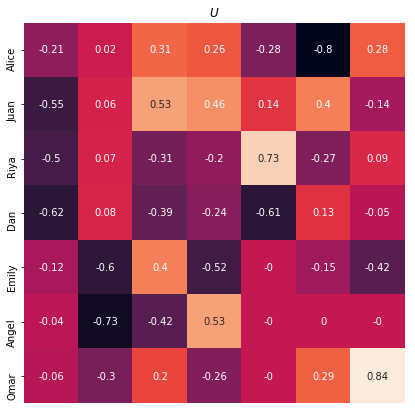

In [105]:
fig, ax = plt.subplots(figsize=(7,7))
ax.set_title("$U$")
sns.heatmap( U.round(2), square=True, annot=True, cbar=False, xticklabels=False, yticklabels=users, ax=ax )
plt.show()

The first two columns represent the first two latent features (that is, genres). The first latent feature seems to correspond to scifi preference, and the second with adventure-romance preference.

### Inspecting $V$

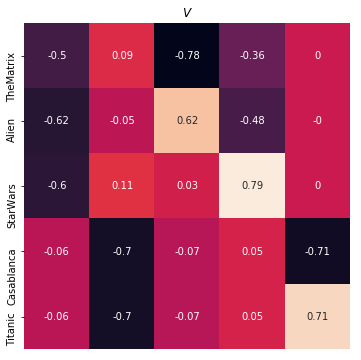

In [83]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_title("$V$")
sns.heatmap( VT.T.round(2), square=True, annot=True, cbar=False, xticklabels=False, yticklabels=movies, ax=ax )
plt.show()

The first two columns, to which we've assigned meanings after looking at $U$, show high scifi scores for all movies except Casablanca and Titanic, which have high **adventure-romance** scores.

### Inspecting $\Sigma$

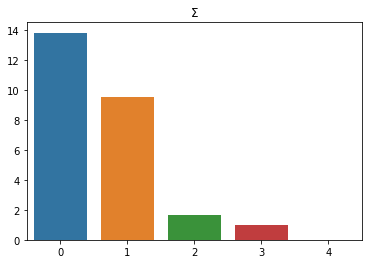

In [95]:
sns.barplot( list(range(len(S))), S )
plt.title("$\Sigma$")
plt.show()

The diagonals of S indicate that latent feature 2 and 3 are non-negligible.

It's tempting to assign meaning to them, but for such a small dataset and relatively small importance values, they're probably just noise.

### Inspecting $U \Sigma$

It may be edifying to look at the product $U \Sigma$. This combination of each user's latent feature weights and the feature importances shows each user's response to a movie with _equal amounts of all latent features_.

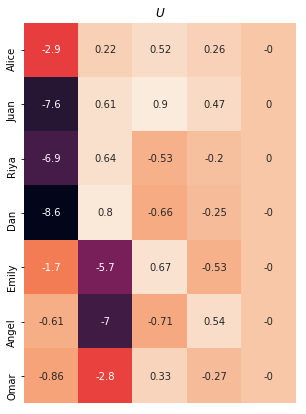

In [107]:
fig, ax = plt.subplots(figsize=(7,7))
ax.set_title("$U$")
sns.heatmap( U.dot(np.eye(7,5)*S).round(2), square=True, annot=True, cbar=False, xticklabels=False, yticklabels=users, ax=ax )
plt.show()

In other words, this predicts how people would respond to **The Fifth Element**, a **scifi-adventure-romance**. Dan would **love** the scifi elements. Angel would **really like** the adventure-romance elements. Omar's kind of meh on the whole thing.

### Reducing dimensions

If we express each person's preferences and each movie's genre in terms of only those two latent features, how faithfully does it explain the ratings data?

In [102]:
ratings_reconstructed = (U[:,0:2].dot( np.diag( S[0:2] ) ).dot( VT[0:2] )).round(2)

movies = ['TheMatrix', 'Alien', 'StarWars', 'Casablanca', 'Titanic']
users = ['Alice', 'Juan', 'Riya', 'Dan', 'Emily', 'Angel', 'Omar']
ratings_reconst_df = pd.DataFrame(ratings_reconstructed, index=users, columns=movies)
ratings_reconst_df

,TheMatrix,Alien,StarWars,Casablanca,Titanic
Alice,1.50,1.81,1.78,0.02,0.02
Juan,3.87,4.67,4.60,0.04,0.04
Riya,3.51,4.23,4.18,-0.03,-0.03
Dan,4.39,5.29,5.22,-0.03,-0.03
Emily,0.33,1.33,0.40,4.08,4.08
Angel,-0.36,0.70,-0.41,4.92,4.92
Omar,0.16,0.67,0.20,2.04,2.04


## PCA, SVD, and performance

### How we just derived PCA

We found the set of eigenvectors $\{\vec{e_i}\}$ of the covariance matrix $M = \frac{1}{n}X^T X$

These satisfy the equation $M \vec{e_i} = \lambda_i \vec{e_i}$, where $\lambda_i$ is the variance along the direction defined by $\vec{e_i}$

Concatenating all these eigenvectors into a matrix $E$ gives us the matrix representing a rotation in feature space.

$X$ in our new coordinates is $X' = XE^T$

Our covariance matrix in these new coordinates is 

$M' = \frac{1}{n}X'^T X' = \frac{1}{n}(XE^T)^T(XE^T) = \frac{1}{n}EX^TXE^T = EME^T$ 

$M' = 
\begin{bmatrix}
\lambda_1 	& 0 	 & \cdots 	  & 0 	\\
0 	& \lambda_2 	 & \cdots 	  & 0 	\\
\vdots 	& \vdots 	 & \ddots & 0 	\\
0 	& 0 & 0 	  & \lambda_p	
\end{bmatrix}
$




## Why are we peeking under the hood? Performance!

Suppose our data set $X$ contains grayscale image data:

  - $500$ images.
  - Each image is $200 \times 200$ pixels.  So, $40,000$ total pixels.
  
Therefore, $X$ is a $500 \times 40,000$ matrix.  Many, many more columns than rows.

**Note:** This is commonly called the $p \gg n$ situation.

Now, we want the eigenstuff of the matrix $X^T X$.

This is a $40,000 \times 40,000$ matrix, so it has $1,600,000,000 = 1.6 \times 10^9$ entries.

One floating point number is:
  - $64$ bits (on a modern computer)
  - $8$ bytes (each byte is $8$ bits).
  
So, $X^T X$ takes

$$ 8 \times 1.6 \times 10^9 = 12.8 \times 10^9 $$

bytes of data to store.  This is $12.8$ gigabytes.  **A huge amount of data**.

The SVD is a bit of linear algebra that gives us $E$ and $M'$ **without having to compute the $X^T X$ matrix, it operating completely on $X$ itself**.  Much more efficient.

### SVD related to PCA

Suppose that we factor $X$ into its singular value decomposition

$$ X = U S V^T $$

We can plug this into $X^T X$ and derive a relationship between PCA and the SVD factorization.

$$ X^T X = (U S V^T)^T (U S V^T) = V S^T U^T U S V^T $$

Since $U$ is orthonormal, the inner $U^T U$ is the identity matrix:

$$ X^T X = V S^T S V^T $$

Comparing the two expressions for $X^t X$

#### PCA

$$ X^T X = E^T M' E $$

#### SVD

$$ X^T X = V S^T S V^T $$

#### Relationship between PCA and SVD

$$ E = V^T $$
$$ M' = S^T S $$

So the **eigenvectors** from PCA are the **columns** of the matrix V.

And the **eigenvalues** from PCA are the **squares of the singular values**.


## Under the hood, every implementation of PCA uses the SVD to compute the eigenvectors and eigenvalues of the covariance matrix